## Creating a Model

In this notebook, we create and solve a single particle model (SPM). This is achieved using a predefined parameter set introduced in Marquis et al. [[1]](https://doi.org/10.1149/1945-7111/abbce4) 

Before we begin, we need to ensure that we have all the necessary tools. We will install PyBOP and upgrade dependencies.

In [1]:
%pip install --upgrade pip ipywidgets -q

import numpy as np
import pybamm

/home/nicola/GitHub/PyBOP/.nox/notebooks-overwrite/bin/python3: No module named pip


Note: you may need to restart the kernel to use updated packages.


## Creating a Model

PyBOP offers the both forward emperical and physics-based forward models. These are provided by PyBaMM, with PyBOP adding wrappers on the underlying classes to reduce complexity and improve stability with parameter inference and design optimisation. Likewise, PyBOP provides a light wrapper on the PyBaMM parameter sets, with user-defined parameters available through the same `pybamm.ParameterValues` class.

Let's construct the parameter set and then the single-particle model (SPM):

In [2]:
model = pybamm.lithium_ion.SPM()
parameter_values = pybamm.ParameterValues("Marquis2019")

Now that the model is constructed with the Marquis parameter set, we can use the `PyBaMM.Simulation` class. This is the recommended way to generate synthetic data, but not for parameter inference as the performance cost of constructing the `Simulation` class is high. For parameter inference, `model.simulate` and `model.simulateS1` offer a performant way to solve the forward model with and without sensitivities respectively.

### Testing the Model
Having constructed the model, we can now have a look at its voltage discharge curve to verify that it is working. The discharge curve is evaluated on the time interval specified by `t_eval`. As we are only working with the forward model, PyBaMM plotting methods will be used; however, when performing parameter inference or design optimisation, PyBOP plotting methods are recommended.

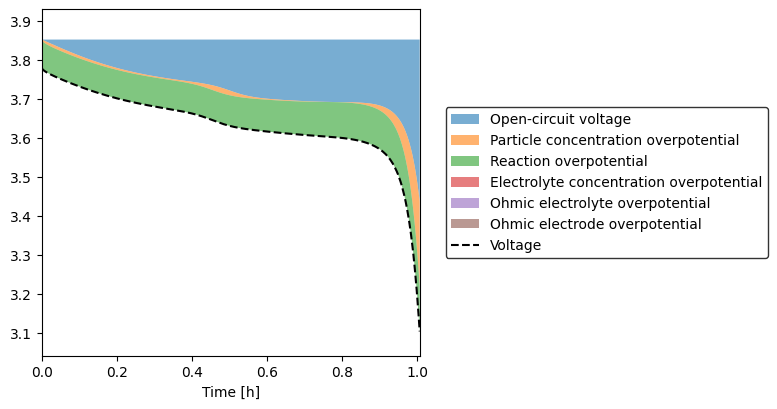

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [3]:
t_eval = np.linspace(0, 3700, 100)
solution = pybamm.Simulation(model, parameter_values=parameter_values).solve(
    t_eval=t_eval
)

# Plot with PyBaMM
solution.plot_voltage_components()